In [ ]:
# how do different demographic groups describe relevance of their surveyed ads?
# interesting to break down by demographic and by code type (can also aggregate over users)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 10)

In [8]:
survey_file = '../../db-processing/survey_responses.tsv'
codes_file = '../../db-processing/ad_codes.tsv'
# pid_adid mapping is needed for participant-level analyses below (comparing median relevance etc.)
pid_adid_files = ['../../db-processing/surveys/survey-1/survey1_coding_subsample.tsv',
                  '../../db-processing/surveys/survey-1/survey1_batch2_coding_subsample.tsv',
                 '../../db-processing/surveys/survey-2/survey2_coding_subsample.tsv',
                 '../../db-processing/surveys/survey-3/survey3_coding_subsample.tsv',
                 '../../db-processing/surveys/survey-4/survey4_coding_subsample.tsv']

survey = pd.read_csv(survey_file, sep='\t')
codes = pd.read_csv(codes_file, sep='\t')
codes = codes[codes['codes_manjot'].isna()]   # drop manjot's codes
adid_codes = dict(zip(codes['adid'], [r.split(';') for r in codes['codes']]))

pid_adid = pd.read_csv(pid_adid_files[0], sep='\t')
for f in pid_adid_files[1:]:
    pid_adid = pd.concat([pid_adid, pd.read_csv(f, sep='\t')], ignore_index=True)

print('pid_adid:', pid_adid.shape)
print('survey:', survey.shape)
    
survey1_pids = set(pid_adid['pid'])
part_ad_counts = pid_adid.groupby('pid').count().to_dict()['adid']

pid_adid: (31177, 2)
survey: (7833, 5)


### Difference in perceived relevance (across users), from survey responses

In [9]:
pids_unique = set(survey['pid'])
relevances = {p: [] for p in pids_unique}
for i in range(survey.shape[0]):
    pid = survey['pid'].iloc[i]
    relevances[pid].append(int(survey['relevance'].iloc[i]))

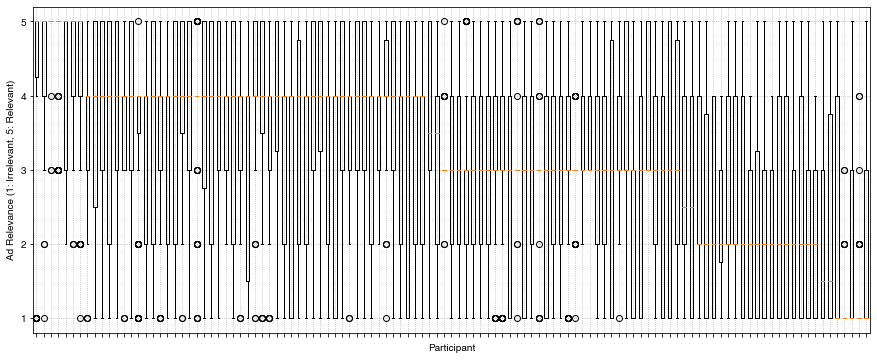

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
# for i, pid in enumerate(relevances.keys()):
#     ax.violinplot(relevances[pid], [i])

# boxplot
surv_ques_count = survey.groupby('pid').count().to_dict()['adid']
pids_order = sorted(pids_unique, key=lambda p: np.median(relevances[p]), reverse=True)
pids_order = [p for p in pids_order if surv_ques_count[p] >= 20]

ax.boxplot([relevances[pid] for pid in pids_order], showbox=True)
ax.set_ylabel('Ad Relevance (1: Irrelevant, 5: Relevant)')
ax.set_xlabel('Participant')
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_xticklabels([])
ax.grid(ls=':')

# plt.savefig('resp-participant-relevance-diff.jpg', dpi=200, bbox_inches='tight')

In [10]:
inspect = pids_order[-1]
# === uncomment below to show full survey responses ===
# survey[survey['pid'] == inspect].merge(codes, 'inner', 'adid').drop('codes_ali', axis=1).sort_values('codes_angelica')

# === uncomment below to show code counts for survey ===
print('total coded for survey #1:', part_ad_counts[inspect])
part_ad_codes = pid_adid[pid_adid['pid'] == inspect].merge(codes, 'inner', 'adid').drop('codes_ali', axis=1)
part_ad_codes.groupby('codes_angelica').count()

total coded for survey #1: 600


KeyError: "['codes_ali'] not found in axis"

**Count of all codes in survey #1**

In [9]:
from collections import Counter

survey_codes = pid_adid.merge(codes, 'inner', 'adid')['codes']
survey_codes_all = []
for s in survey_codes:
    survey_codes_all.extend(s.split(';'))
    
counts = Counter(survey_codes_all)
print(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print('Total:', sum(counts.values()))

[('Benign', 12909), ('Healthcare', 3166), ('Opportunity', 1554), ('Study', 976), ('Financial', 755), ('Clickbait', 601), ('Sensitive', 427), ('Potentially Prohibited', 230), ('Political', 156), ('CA Lawsuit', 125), ('Potentially Harmful', 119), ("Can't determine, return to this one", 36)]
Total: 21054


In [69]:
print(survey.shape, codes.shape)
survey.merge(codes, 'inner', 'adid')

(1701, 5) (9345, 3)


,pid,adid,relevance,like,dislike,codes_angelica,codes_ali
0,60e3dea3ffbd0e2a90942794,23848939363060753,2,It is clear what product the ad is selling.;It...,I do not dislike this ad.,Benign,NaN
1,60e3dea3ffbd0e2a90942794,23848436700880745,4,I am interested in what is being advertised.;I...,I do not dislike this ad.,Healthcare,NaN
2,60e3dea3ffbd0e2a90942794,6261993048368,5,"It is useful, interesting, or informative.;It ...",I do not dislike this ad.,Healthcare,NaN
3,60e3dea3ffbd0e2a90942794,23848430450430711,5,"It is useful, interesting, or informative.;I a...",I do not dislike this ad.,Healthcare,NaN
4,60e3dea3ffbd0e2a90942794,6260681959992,5,"It is useful, interesting, or informative.;I a...",I do not dislike this ad.,Benign,NaN
...,...,...,...,...,...,...,...
1696,61623ea92118b60ca97113c7,23849179782160161,4,I do not like this ad.,"I do not trust this ad, it seems like a scam.",Benign,NaN
1697,61623ea92118b60ca97113c7,6267736226001,3,I do not like this ad.,I find the ad pushy or it causes me to feel an...,Benign,NaN
1698,61623ea92118b60ca97113c7,23848698585160718,4,I do not like this ad.,I do not dislike this ad.,Benign,NaN
1699,61623ea92118b60ca97113c7,23849463119930263,4,"It is useful, interesting, or informative.",I do not like the design of the ad.,Benign,Benign


In [13]:
# preprocessing for participant-level code-specific relevance plot

from collections import defaultdict
code_relevances = {p: defaultdict(lambda: []) for p in pids_order}

for p in pids_order:
    survey_codes = survey[survey['pid'] == p].merge(codes, 'inner', 'adid')
    for r in range(survey_codes.shape[0]):        
        curr_codes = survey_codes.iloc[r]['codes']
        for c in curr_codes.split(';'):
            rel = int(survey_codes.iloc[r]['relevance'])
            code_relevances[p][c].append(rel)            

/Users/muhammadali/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


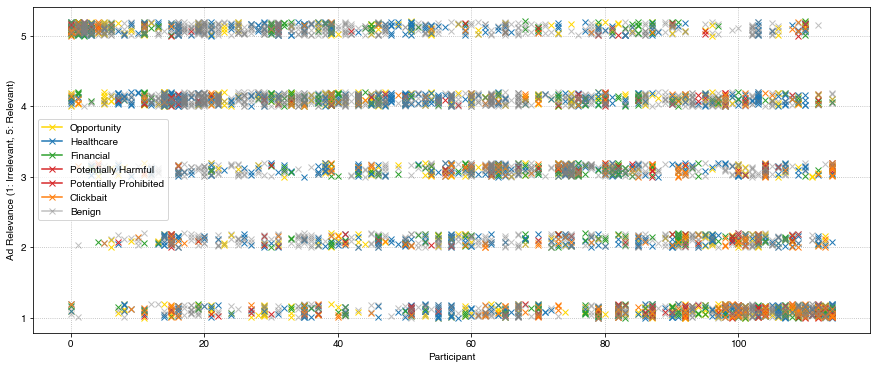

In [14]:
survey_themes = ["Opportunity", "Healthcare", "Financial", "Potentially Harmful", "Potentially Prohibited",
                 "Clickbait", "Benign"]
labeled = {t: False for t in survey_themes}
cols = ["gold", "tab:blue", "tab:green", "tab:red", "tab:red", "tab:orange", "grey"]
cols = dict(zip(survey_themes, cols))

# similar to the box plot, but markers are colored by angelica's codes, showing how relevant participants
# find different kinds of ads
fig, ax = plt.subplots(figsize=(15,6))


for p, pid in enumerate(pids_order):
    for c in survey_themes:
        if c in code_relevances[pid]:
            for cr in code_relevances[pid][c]:
                jitter = np.random.uniform(0, 0.2)
                ax.plot(p, cr + jitter, marker='x', color=cols[c], alpha=.5 if c=="Benign" else 1,
                       label=c if not labeled[c] else '')
                labeled[c] = True

# ax.boxplot([relevances[pid] for pid in pids_order], showbox=True)
ax.set_ylabel('Ad Relevance (1: Irrelevant, 5: Relevant)')
ax.set_xlabel('Participant')
ax.set_yticks([1, 2, 3, 4, 5])
ax.legend()
ax.grid(ls=':')

**Compare fraction of non-benign ads vs. median relevance**

In [6]:
from collections import defaultdict, Counter

def count_code_props(codes, norm=True):
    # takes dict from adid -> codes and returns dict of code proportions
    counts = defaultdict(lambda: 0)
    for aid in codes:
        # in case of multiple codes, count each one -- essentially computing fraction of codes and not ads here
        for code in codes[aid].split(';'):
            counts[code] += 1                
    if norm:
        return {c: counts[c]/sum(counts.values()) for c in counts}
    else:
        return counts

part_code_props = {}
part_code_counts = {}

for pid in pids_unique:
    joiner = pid_adid[pid_adid['pid'] == pid]
    joined = joiner.merge(codes, how='inner', left_on='adid', right_on='adid')
    
    code_props = count_code_props(dict(joined[['adid', 'codes_angelica']].values), norm=True)
    part_code_props[pid] = code_props
    
    code_counts = count_code_props(dict(joined[['adid', 'codes_angelica']].values), norm=False)
    part_code_counts[pid] = code_counts

In [177]:
# TODO: there's a small bug here, a participant's part_code_counts only has Benign: 0 and nothing else
benign = []
med_relevances = []

for pid in pids_order:
    if part_code_counts[pid]['Benign'] == 0:
        continue
    benign.append(part_code_counts[pid]['Benign'] / sum(part_code_counts[pid].values()))
    med_relevances.append(np.mean(relevances[pid]))    

[0.963265306122449, 0.41044776119402987, 0.5404255319148936, 0.5357142857142857, 0.748898678414097, 0.9438202247191011, 0.9411764705882353, 0.8538011695906432, 0.46153846153846156, 0.7037037037037037, 0.7128712871287128, 0.7631578947368421, 0.8531468531468531, 0.6703296703296703, 0.4375, 0.7526315789473684, 0.9135802469135802, 0.898989898989899, 0.8795180722891566, 0.75, 0.5869565217391305, 0.9076923076923077, 0.5462184873949579, 0.5435684647302904, 0.6063829787234043, 0.9573170731707317, 0.8125, 0.6855345911949685, 0.755, 0.7823529411764706, 0.8770491803278688, 0.852112676056338, 0.8293333333333334, 0.40225563909774437, 0.5, 0.7451923076923077, 0.6666666666666666, 0.8369565217391305, 0.8242009132420092, 0.9435483870967742, 0.36681222707423583, 0.48641304347826086, 0.6964285714285714, 0.5036496350364964, 0.5133928571428571, 0.6372549019607843]


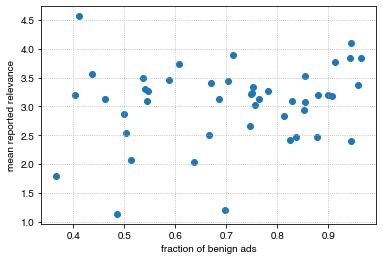

In [178]:
print(benign)
plt.scatter(benign, med_relevances)
plt.xlabel('fraction of benign ads')
plt.ylabel('mean reported relevance')
plt.grid(ls=':')

In [ ]:
# TODO: maybe compare relevance scores of benign vs. non-benign ads in all the surveys?

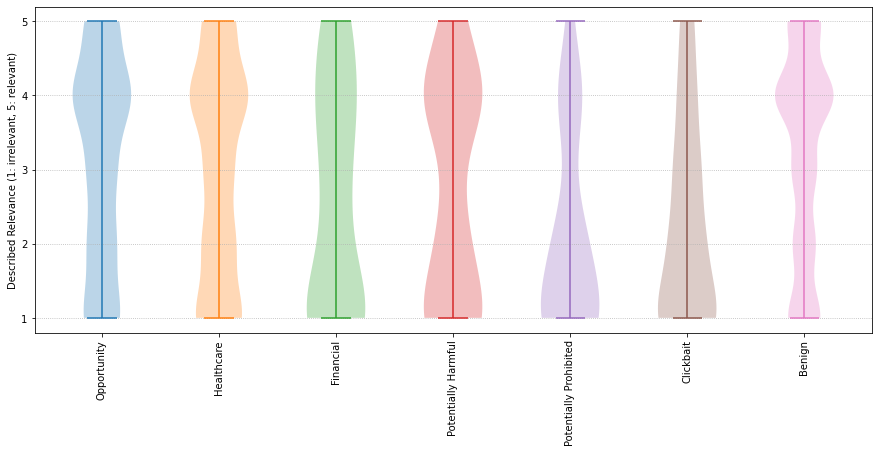

In [64]:
# visualize distributions
code_rels_all = {c: [] for c in survey_themes}
for c in survey_themes:
    for pid in pids_order:
        code_rels_all[c].extend(code_relevances[pid][c])

fig, ax = plt.subplots(figsize=(15,6))
for i, c in enumerate(survey_themes):
    ax.violinplot(code_rels_all[c], [i])
    
ax.set_xticks(range(len(survey_themes)))
ax.set_xticklabels(survey_themes, rotation=90)
ax.set_ylabel("Described Relevance (1: irrelevant, 5: relevant)")
ax.set_yticks(range(1, 6))
ax.set_yticklabels(range(1, 6))
ax.grid(ls=':', axis='y')

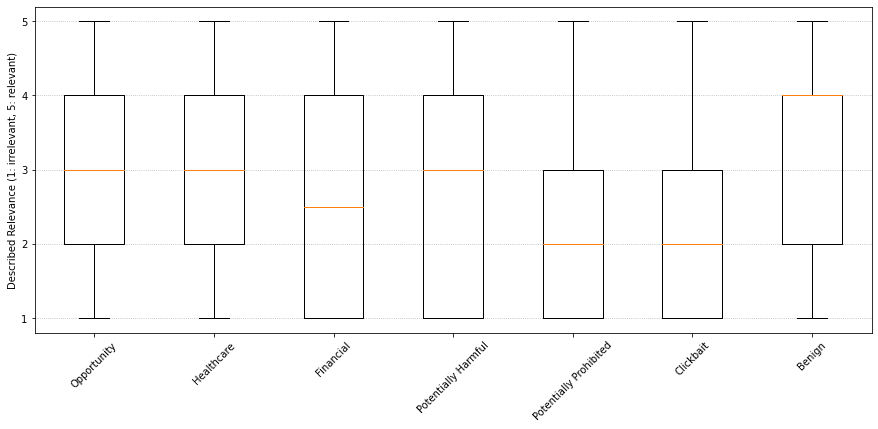

In [65]:
fig, ax = plt.subplots(figsize=(15,6))

ax.boxplot([code_rels_all[c] for c in survey_themes], showbox=True)

ax.set_xticks(range(1, len(survey_themes)+1))
ax.set_xticklabels(survey_themes, rotation=45)
ax.set_ylabel("Described Relevance (1: irrelevant, 5: relevant)")
ax.set_yticks(range(1, 6))
ax.set_yticklabels(range(1, 6))
ax.grid(ls=':', axis='y')

plt.savefig('resp-code-relevance-diff.jpg', dpi=200, bbox_inches='tight')

N=109


(array([16.,  0., 10.,  0.,  0., 23.,  0., 38.,  0., 22.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

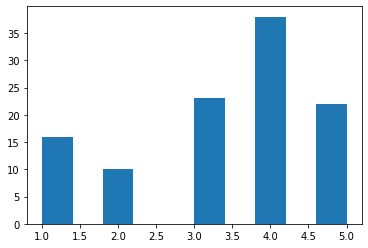

In [122]:
c = 'Opportunity'
print(f'N={len(code_rels_all[c])}')

plt.hist(code_rels_all[c])

Fascinating/Perplexing results -- it's odd to see so many people taking an interest in healthcare ads. For codes such as healthcare where there are a lot of varied responses, we have all the data to be able to look at why people are findig them relevant vs. not. For the relevance scores <= 2, what were responses to the like/dislike questions? for the relevance scores > 3, what were the responses?

**In addition** to looking at these distribution of relevance scores, another way to begin understanding user perceptions might be to see the major _feelings_ people associate with each code from the like/dislike questions? trusting vs. finding scammy vs. finding them useful.

**Furthermore**, these analyses are currently trying to see the distribution of a code/kind of ad overall. We must always remember to find cases where a user is vulnerable to a certain kind of ad, and constantly mentions a dislike towards them. Such nuances would be hard to pinpoint from these higher, code-level analyses.

#### Next Analyses:

can i generate a participant-level PDF of plots that shows:
- number of ads contributed (until survey date)
- number of ads ended up in survey
- distribution of codes from the survey
- stacked histogram of relevance, colored by code
- most popular answers by code (tentative, need to spend some time building answer-level analyses first)

### What reasons of like/dislike are associated most often with each code?

In [15]:
short_names = {
    # dislike
    "I do not dislike this ad.": "dont-dislike",
    "I cannot tell what is being advertised.": "unclear",
    "It is irrelevant to me, or doesn’t contain interesting information.": "irrelevant",
    "I find the ad pushy or it causes me to feel anxious.": "pushy",
    "It contains clickbait, sensationalized, or shocking content.": "clickbait",
    "I do not trust this ad, it seems like a scam.": "scam",
    "I dislike the type of product being advertised.": "dislike-product",
    "I do not like the design of the ad.": "dislike-design",
    "I find the content uncomfortable, offensive, or repulsive.": "uncomfortable",    
    "I dislike the advertiser.": "dislike-advertiser",
    "I dislike the political nature of the ad.": "political",
    # like
    "The content is engaging, clever or amusing.": "amusing",
    "It is well designed or eye-catching.": "like-design",
    "I am interested in what is being advertised.": "interested",
    "It is clear what product the ad is selling.": "clear",
    "I trust the ad, it looks authentic or trustworthy.": "trust-ad",
    "I trust the advertiser.": "trust-advertiser",
    "It is useful, interesting, or informative.": "useful",
    "It clearly looks like an ad and can be filtered out.": "filterable",
    "I do not like this ad.": "dont-like"
}

like_list = ["amusing", "like-design", "interested", "clear", "trust-ad",
             "trust-advertiser", "useful", "filterable", "dont-like"]
dislike_list = ["dont-dislike", "unclear", "irrelevant", "pushy", "clickbait",
                "scam", "dislike-product", "dislike-design", "uncomfortable",
                "dislike-advertiser", "political"]

# actual reasons for liking or disliking
like_reasons = set(like_list) - set(["dont-like"])
dislike_reasons = set(dislike_list) - set(["dont-dislike"])

In [51]:
from collections import defaultdict, Counter

survey_codes = survey.merge(codes, 'inner', 'adid')

perceptions = defaultdict(list)  # perceptions by code
survey_code_counts = Counter()

for i in range(survey_codes.shape[0]):
    row = survey_codes.iloc[i]
    for curr_code in row['codes'].split(';'):
        survey_code_counts[curr_code] += 1
        # add both reasons for like and dislike into some arrray
        perceptions[curr_code].extend([short_names[r] for r in row['like'].split(';')])
        perceptions[curr_code].extend([short_names[r] for r in row['dislike'].split(';')])        
        
# simplified perceptions: financial/opportunity/healthcare = other
perceptions_simp = defaultdict(list)
survey_code_counts = Counter()

for i in range(survey_codes.shape[0]):
    row = survey_codes.iloc[i]
    for curr_code in row['codes'].split(';'):
        if curr_code in ['Financial', 'Opportunity', 'Healthcare']:
            code_simp = 'Other'
        elif curr_code in ['Potentially Harmful', 'Clickbait', 'Potentially Prohibited']:
            code_simp = 'Deceptive'
        else:
            code_simp = curr_code
            
        survey_code_counts[code_simp] += 1
        perceptions_simp[code_simp].extend([short_names[r] for r in row['like'].split(';')])
        perceptions_simp[code_simp].extend([short_names[r] for r in row['dislike'].split(';')])

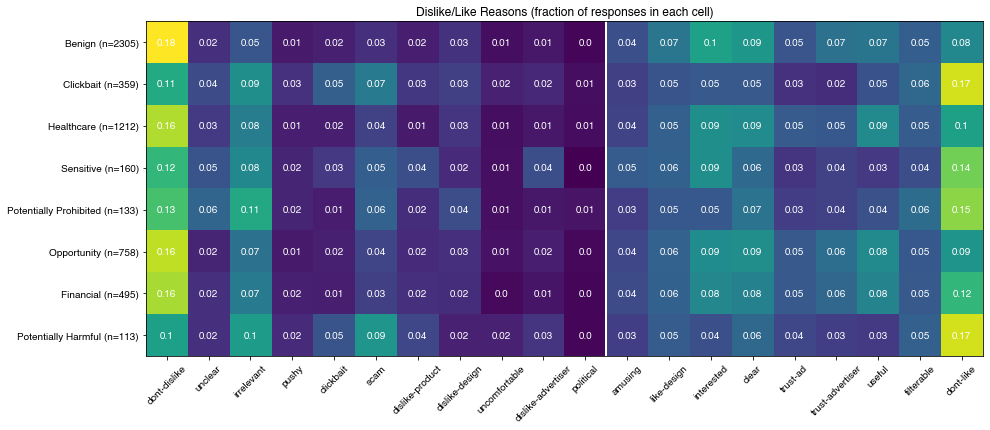

In [24]:
# note: this is essentially showing p(reason|code)
dislike_mat = []
like_mat = []
perceptions_mat = []
f, ax = plt.subplots(figsize=(15, 15))

# === plot the dislike matrix ===
plot_codes = []
benign_freqs = Counter(perceptions['Benign'])
for c in perceptions:
    if c in ['Political', "Can't determine, return to this one", "Study", "CA Lawsuit"]:
        continue
        
    plot_codes.append(f'{c} (n={survey_code_counts[c]})')
    freqs = Counter(perceptions[c])
    code_row = []
    # important to traverse in the same order -- dislike first, then like
    for reason in dislike_list + like_list:
        if reason in freqs:
            # ratio w.r.t benign
#             code_row.append((freqs[reason]/sum(freqs.values())) / (benign_freqs[reason]/sum(benign_freqs.values())))
            code_row.append(freqs[reason]/sum(freqs.values()))
        else:
            code_row.append(0)
    perceptions_mat.append(code_row)
    
perceptions_mat = np.array(perceptions_mat)
im = ax.imshow(perceptions_mat)
ax.set_yticks(np.arange(perceptions_mat.shape[0]), labels=plot_codes)
ax.set_xticks(np.arange(perceptions_mat.shape[1]), labels=dislike_list+like_list, rotation=45)
ax.set_title('Dislike/Like Reasons (fraction of responses in each cell)')
# ax.set_title('Dislike/Like Reasons -- (fraction of responses : fraction of responses for benign) in each cell')
for i in range(perceptions_mat.shape[0]):
    for j in range(perceptions_mat.shape[1]):
        text = ax.text(j, i, round(perceptions_mat[i, j], 2), ha="center", va="center", color="w", fontsize=10)
    
ax.axvline(len(dislike_list)-0.5, color='white', lw=2)
        
# plt.savefig('like-dislike-reasons-full.pdf', dpi=200, bbox_inches='tight')
# plt.savefig('like-dislike-ratio-benign.pdf', dpi=200, bbox_inches='tight')

#### Simplifying above plot

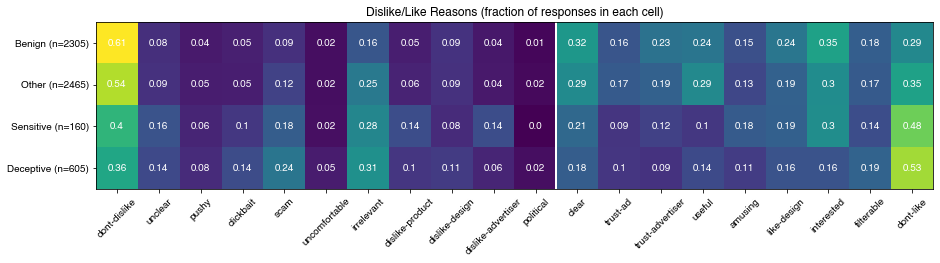

In [53]:
# note: this is essentially showing p(reason|code)
dislike_mat = []
like_mat = []
perceptions_mat = []
f, ax = plt.subplots(figsize=(15, 15))

# reordering dislike+like list to have scam-related reasons first
dislike_list = ['dont-dislike',
                "unclear", "pushy", "clickbait", "scam", "uncomfortable",
                'irrelevant', 'dislike-product', 'dislike-design', 'dislike-advertiser', 'political']
like_list = ['clear', 'trust-ad', 'trust-advertiser', 'useful',
             'amusing', 'like-design', 'interested', 'filterable', 'dont-like']

# === plot the dislike matrix ===
plot_codes = []
benign_freqs = Counter(perceptions['Benign'])
# for c in ["Benign", "Other", "Sensitive", "Clickbait", "Potentially Harmful", "Potentially Prohibited"]:
for c in ["Benign", "Other", "Sensitive", "Deceptive"]:
    plot_codes.append(f'{c} (n={survey_code_counts[c]})')
    freqs = Counter(perceptions_simp[c])
    code_row = []
    # important to traverse in the same order -- dislike first, then like
    for reason in dislike_list + like_list:
        if reason in freqs:
            # ratio w.r.t benign
#             code_row.append((freqs[reason]/sum(freqs.values())) / (benign_freqs[reason]/sum(benign_freqs.values())))
#             code_row.append(freqs[reason]/sum(freqs.values()))
            # fraction of all ads of the type, instead of # of responses of type
            code_row.append(freqs[reason]/survey_code_counts[c])
        else:
            code_row.append(0)
    perceptions_mat.append(code_row)
    
perceptions_mat = np.array(perceptions_mat)
im = ax.imshow(perceptions_mat)
ax.set_yticks(np.arange(perceptions_mat.shape[0]), labels=plot_codes)
ax.set_xticks(np.arange(perceptions_mat.shape[1]), labels=dislike_list+like_list, rotation=45)
ax.set_title('Dislike/Like Reasons (fraction of responses in each cell)')
# ax.set_title('Dislike/Like Reasons -- (fraction of responses : fraction of responses for benign) in each cell')
for i in range(perceptions_mat.shape[0]):
    for j in range(perceptions_mat.shape[1]):
        text = ax.text(j, i, round(perceptions_mat[i, j], 2), ha="center", va="center", color="w", fontsize=10)
    
ax.axvline(len(dislike_list)-0.5, color='white', lw=2)
        
plt.savefig('like-dislike-reasons-double-simplified.pdf', dpi=200, bbox_inches='tight')
# plt.savefig('like-dislike-ratio-benign.pdf', dpi=200, bbox_inches='tight')

### High Level Like/Dislike

**Goal (from brainstorming doc):** Descriptive analysis of why people like/not like ads? 
- Descriptive overall + broken out by demographic groups + broken out by ad tags
- Could do some stats hypothesis test to evaluate differences between demographics and ad tags

### Other unanswered Questions
- What reason for liking and disliking is most associated with each code? The heatmap perhaps answers this already

In [27]:
survey_codelist = ["Opportunity", "Healthcare", "Financial", "Potentially Prohibited",
                   "Potentially Harmful", "Clickbait", "Benign"]

In [30]:
part_likes = defaultdict(dict)
code_ld = defaultdict(lambda: {'like': 0, 'dislike': 0})
code_ld_count = defaultdict(lambda: {'like': 0, 'dislike': 0})

# pid -> like: [adid, adid,...]; 
part_ld_ads = defaultdict(lambda: {'like': [], 'dislike': []})
part_ld = defaultdict(lambda: {'like': 0, 'dislike': 0})
part_ld_count = defaultdict(lambda: {'like': 0, 'dislike': 0})
part_dislike_code = defaultdict(Counter)    # pid -> code -> n_dislikes

# for contextualizing `part_ld`: pid -> {Benign: count, Harmful: count,...}
part_surv_dist = defaultdict(lambda: {c: 0 for c in survey_codelist})
for i in range(survey_codes.shape[0]):
    row = survey_codes.iloc[i]
    pid = row['pid']
    for c in row['codes'].split(';'):
        if c in survey_codelist:
            part_surv_dist[pid][c] += 1

In [31]:
like_n, dislike_n, unclear = 0, 0, 0
for i in range(survey_codes.shape[0]):
    row = survey_codes.iloc[i]
    adid = row['adid']; pid = row['pid']
    part_like_reasons = set([short_names[r] for r in row['like'].split(';')])
    part_dislike_reasons = set([short_names[r] for r in row['dislike'].split(';')])
    
    if len(part_like_reasons & like_reasons) >= 1:
        like_n += 1
        # register participant info
        part_ld_ads[pid]['like'].append(adid)
        part_ld[pid]['like'] += 1
        part_ld_count[pid]['like'] += len(part_like_reasons & like_reasons)
        
        # register code info
        for c in adid_codes[adid]:
            # count likes and dislikes by code
            code_ld[c]['like'] += 1
            code_ld_count[c]['like'] += len(part_like_reasons & like_reasons)
    if len(part_dislike_reasons & dislike_reasons) >= 1:        
        dislike_n += 1
        part_ld_ads[pid]['dislike'].append(adid)
        part_ld[pid]['dislike'] += 1
        part_ld_count[pid]['dislike'] += len(part_dislike_reasons & dislike_reasons)        
        
        for c in adid_codes[adid]:
            code_ld[c]['dislike'] += 1
            code_ld_count[c]['dislike'] += len(part_dislike_reasons & dislike_reasons)
            part_dislike_code[pid][c] += 1
    if "dont-like" in part_like_reasons or "dont-dislike" in part_dislike_reasons:
        unclear += 1
        
print(like_n, dislike_n, unclear)

2704 1717 3286


**Concern**: the ad diet distribution of each of these users is so vastly different, we should try to compare users who have similar distributions -- within each of these groups then, results would make more sense.

In [33]:
import tabulate

tab = [['Code', 'Likes', 'Dislikes', 'L:D']]
tab_basic = [['Code', 'Likes', 'Dislikes', 'L:D']]

for c in code_ld_count:
    tab.append([c, code_ld_count[c]['like'], code_ld_count[c]['dislike'],
                round(code_ld_count[c]['like']/code_ld_count[c]['dislike'], 2)])
    
    tab_basic.append([c, code_ld[c]['like'], code_ld[c]['dislike'],
                round(code_ld[c]['like']/code_ld[c]['dislike'], 2)])

print(tabulate.tabulate(tab))
print(tabulate.tabulate(tab_basic))

-----------------------------------  -----  --------  ----
Code                                 Likes  Dislikes  L:D
Benign                               3438   1133      3.03
Healthcare                           1602   760       2.11
Sensitive                            205    174       1.18
Clickbait                            281    336       0.84
Opportunity                          1050   380       2.76
Potentially Prohibited               146    136       1.07
Financial                            687    275       2.5
Study                                370    154       2.4
Potentially Harmful                  51     69        0.74
Political                            5      8         0.62
Can't determine, return to this one  2      2         1.0
CA Lawsuit                           0      9         0.0
-----------------------------------  -----  --------  ----
-----------------------------------  -----  --------  ----
Code                                 Likes  Dislikes  L:D
Ben

In [34]:
# show total survey makeup distribution
total_surv_dist = {c: 0 for c in survey_codelist}
for pid in part_surv_dist:
    for c in part_surv_dist[pid]:
        if c in total_surv_dist:
            total_surv_dist[c] += part_surv_dist[pid][c]
            
tab = [['Code', 'N', '%']]
total_total = sum(total_surv_dist.values())
for c in total_surv_dist:
    tab.append([c, total_surv_dist[c], round(total_surv_dist[c]/total_total*100, 2)])
    
tab.append(['Total', total_total, ''])
print(tabulate.tabulate(tab))

----------------------  ----  -----
Code                    N     %
Opportunity             559   13.57
Healthcare              943   22.89
Financial               370   8.98
Potentially Prohibited  122   2.96
Potentially Harmful     52    1.26
Clickbait               257   6.24
Benign                  1817  44.1
Total                   4120
----------------------  ----  -----


In [35]:
total_surv_dist

{'Opportunity': 559,
 'Healthcare': 943,
 'Financial': 370,
 'Potentially Prohibited': 122,
 'Potentially Harmful': 52,
 'Clickbait': 257,
 'Benign': 1817}

## by participant

In [17]:
# print order: ascending in fraction benign
order = sorted(part_ld.keys(), key=lambda p: part_surv_dist[p]['Benign']/sum(part_surv_dist[p].values()))
ld_ratios = []

tab = [['Like', 'Dislike', 'L:D', 'B', 'C', 'Hr', 'Pr', 'H', 'F']]
for pid in order:
    ld = part_ld[pid]
    total = sum(ld.values())
    if ld['dislike'] > 0:
        ld_ratio = round(ld['like']/ld['dislike'], 2)
        ld_ratios.append(ld_ratio)
    else:
        ld_ratio = '--'
    row = [ld['like'], ld['dislike'], ld_ratio,
           part_surv_dist[pid]["Benign"],
           part_surv_dist[pid]["Clickbait"],
           part_surv_dist[pid]["Potentially Harmful"],
           part_surv_dist[pid]["Potentially Prohibited"],
           part_surv_dist[pid]["Healthcare"], part_surv_dist[pid]["Financial"]]
    tab.append(row)
    
print(tabulate.tabulate(tab))

----  -------  ----  --  --  --  --  --  --
Like  Dislike  L:D   B   C   Hr  Pr  H   F
2     58       0.03  5   6   4   0   7   5
60    54       1.11  5   7   3   2   10  5
24    36       0.67  5   5   4   1   5   5
16    22       0.73  6   6   1   1   12  2
58    18       3.22  6   5   1   1   6   7
46    28       1.64  7   4   4   3   9   2
54    8        6.75  6   4   0   1   9   6
28    56       0.5   6   5   0   0   9   6
50    14       3.57  6   6   8   0   4   1
18    32       0.56  6   4   5   0   7   8
44    18       2.44  8   0   2   2   16  1
44    46       0.96  7   1   8   0   12  0
30    48       0.62  8   0   3   2   13  1
88    40       2.2   14  8   3   0   15  14
28    32       0.88  7   3   1   1   8   7
48    48       1.0   8   4   1   0   9   3
54    6        9.0   7   6   2   0   8   4
80    86       0.93  16  4   7   9   23  3
60    0        --    8   0   0   1   11  4
56    38       1.47  8   2   6   3   8   3
16    50       0.32  8   0   8   3   9   1
64    30 

(-0.6685000000000001, 15.0)

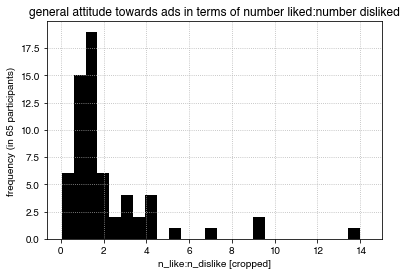

In [18]:
plt.hist(ld_ratios, color='k', bins=25)

plt.xlabel('n_like:n_dislike [cropped]')
plt.ylabel('frequency (in 65 participants)')
plt.title('general attitude towards ads in terms of number liked:number disliked')
plt.grid(ls=':')
plt.xlim(right=15)

This really does feel like multi-level data in the real sense: within each participant, there are certain codes, and each code has a like/dislike count/fraction -- there should be elegant ways to express this.

*Notes*: what about only comparing within each ad code? compare clickbait only with other users' clickbait. x-axis: participant, y-axis: proportion clickbait liked (w/ error bars)

Example model: `frac_disliked ~ (1|pid) + n_benign + n_clickbait + n_healthcare...`

### CDF of Dislikes

$p(dislike | code, participant)$ -> numbers saved in `part_dislike_code`

In [151]:
# p(dislike|code, participant) = n(dislike, code, participant)/n(code, participant)

Text(0, 0.5, 'Fraction **disliked**')

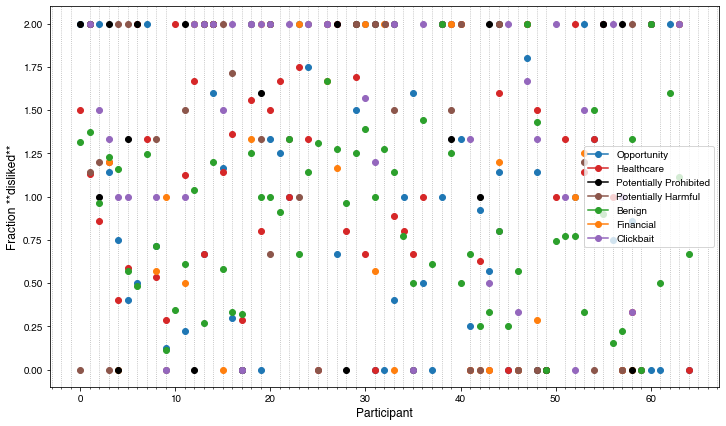

In [19]:
import random
from matplotlib.ticker import MultipleLocator

f, ax = plt.subplots(1, 1, figsize=(12, 7))

order = sorted(part_ld.keys(), key=lambda p: sum(part_ld[p].values()), reverse=True)
colors = ['tab:blue', 'tab:red', 'tab:orange', 'black', 'tab:brown', 'tab:purple', 'tab:green']

labeled = {c: False for c in survey_codelist}

minorLocator = MultipleLocator(1)
for x, p in enumerate(order):
    for y, c in enumerate(survey_codelist):
        # don't plot dislike rate if participant was never shown the code in survey
        if part_surv_dist[p][c] > 0:
            ax.plot([x+random.uniform(0, 0.01)], [part_dislike_code[p][c]/part_surv_dist[p][c]],
                    color=colors[y], marker='o', label=c if not labeled[c] else '')
            labeled[c] = True

ax.xaxis.set_minor_locator(minorLocator)
ax.grid(ls=':', which='minor')
ax.legend()
ax.set_xlabel('Participant', fontsize=12)
ax.set_ylabel('Fraction **disliked**', fontsize=12)

# plt.savefig('part_code_dislike_fracs.png', dpi=200)

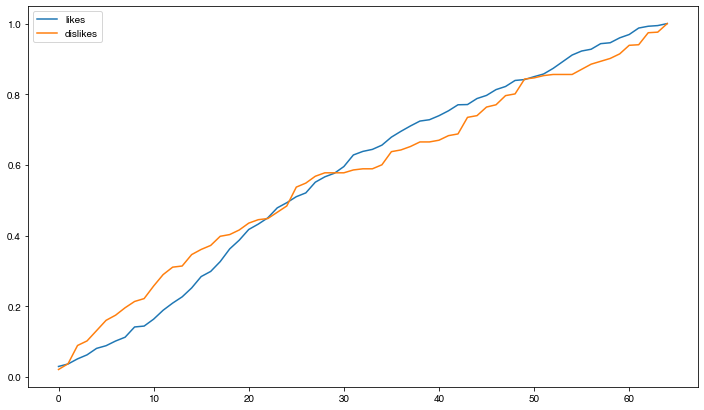

In [144]:
order = part_ld.keys()
likes = [part_ld[p]['like'] for p in order]
likes_pdf = np.array(likes) / sum(likes)
likes_cdf = np.cumsum(likes_pdf)

dislikes = [part_ld[p]['dislike'] for p in order]
dislikes_pdf = np.array(dislikes) / sum(dislikes)
dislikes_cdf = np.cumsum(dislikes_pdf)

f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(range(len(likes_cdf)), likes_cdf, label='likes')
ax.plot(range(len(dislikes_cdf)), dislikes_cdf, label='dislikes')
ax.legend()